In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from hypothesis.distribution import MixtureOfNormals
from torch.distributions.normal import Normal

# Target Distribution

In [2]:
def log_likelihood(x):
    c0 = Normal(torch.tensor([-10.0]), torch.tensor([3.0]))
    c1 = Normal(torch.tensor([0.0]), torch.tensor([1.0]))
    c2 = Normal(torch.tensor([10.0]), torch.tensor([6.0]))
    dist = MixtureOfNormals([c0, c1, c2], [0.4, 0.2, 0.4])
    likelihood = dist.log_prob(x)

    return likelihood

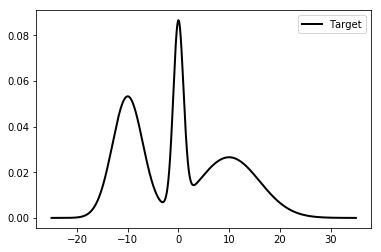

In [3]:
min_x = np.amin(-25)
max_x = np.amax(35)
x_range = np.linspace(float(min_x), float(max_x), 30000)

plt.plot(x_range, log_likelihood(torch.from_numpy(x_range).float()).exp().numpy(), lw=2, c='black', label='Target')
plt.legend()
plt.show()

# Sampling

In [4]:
from hypothesis.transition import NormalTransitionDistribution

transition = NormalTransitionDistribution()

In [5]:
from hypothesis.sampling import MetropolisHastings
from hypothesis.sampling import HamiltonianMonteCarlo

sampler_mhmc = MetropolisHastings(log_likelihood, transition)
sampler_hmc = HamiltonianMonteCarlo(log_likelihood, 20, 1)

In [6]:
x_0 = torch.tensor(30).float()

result_mhmc = sampler_mhmc.sample(
    x_0=x_0,
    samples=5000,
    burnin_steps=1000)

result_hmc = sampler_hmc.sample(
    x_0=x_0,
    samples=5000,
    burnin_steps=1000)

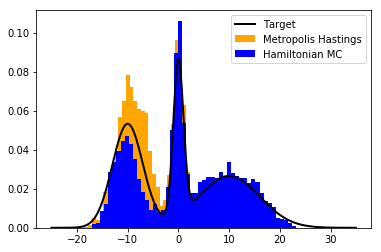

In [7]:
samples_mhmc = [x.item() for x in result_mhmc.chain()]
samples_hmc = [x.item() for x in result_hmc.chain()]

plt.plot(x_range, log_likelihood(torch.from_numpy(x_range).float()).exp().numpy(), lw=2, c='black', label='Target')
plt.hist(samples_mhmc, bins=50, density=True, color='orange', label='Metropolis Hastings')
plt.hist(samples_hmc, bins=50, density=True, color='blue', label='Hamiltonian MC')
plt.legend()
plt.show()